In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model'
df = pd.read_csv(os.path.join(dpath,'cluster_assignment.csv.gz' )) 


In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,M_h,M_p,gamma^D_p,gamma^D_h,R_p,R_h,E^O_p,E^I_p,...,logerror,message,type,max_nonzero_day,negative,zero,cluster,cluster2,UMAP1,UMAP2
0,0,0,4.502398e-06,3.996791e-06,0.365975,0.070244,6.625,6.625,0.000009,0.000010,...,8.631307,NaN,de3,8.779167,False,False,5.0,5.0,8.551019,14.969038
1,1,0,4.001982e-06,7.086781e-06,0.040492,0.911524,6.625,6.625,0.000003,0.000001,...,8.619667,NaN,de3,25.720139,False,False,5.0,5.0,9.525745,11.655981
2,2,0,5.660195e-06,1.106181e-05,0.701770,0.569487,6.625,6.625,0.000004,0.000007,...,8.618590,NaN,de3,22.753472,False,False,-1.0,7.0,0.573815,11.419992
3,3,0,7.570845e-06,9.444341e-06,0.079173,0.384086,6.625,6.625,0.000007,0.000001,...,8.635134,NaN,de3,8.779167,False,False,-1.0,7.0,-1.609419,9.430687
4,4,0,6.165933e-07,1.176978e-08,0.201885,0.221401,6.625,6.625,0.000008,0.000005,...,8.634655,NaN,de3,8.779167,False,False,-1.0,10.0,3.171893,3.971223


In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h',
       'R_p', 'R_h', 'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p',
       'K^OC_p', 'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type', 'max_nonzero_day', 'negative',
       'zero', 'cluster', 'cluster2', 'UMAP1', 'UMAP2'],
      dtype='object')

In [10]:
x_cols = run_sensitivity.params_to_update
# ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h',
#        'R_p', 'R_h', 'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p',
#        'K^OC_p', 'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
#        'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
#        'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
#        'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
#        'r0_p', 'r0_h', 'b_p', 'b_h',]

y_col = 'cluster2'

In [29]:
df.cluster.unique(), df.cluster2.unique()

(array([ 5., -1.,  3., nan,  2.,  6.,  4.,  0.,  1.]),
 array(['5.0', '7.0', '10.0', '3.0', 'zero', '2.0', '6.0', 'negative',
        '8.0', '4.0', '0.0', '1.0', '9.0'], dtype=object))

In [11]:
df['cluster3'] =  df.cluster2
df.loc[~df.cluster3.isin(['zero', 'negative',]), 'cluster3'] = 'regular'

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier
X = df[x_cols]
y = df[y_col]
clf = HistGradientBoostingClassifier().fit(X, y)
clf.score(X, y)

In [ ]:
sns.set_context('paper')
from sklearn.inspection import PartialDependenceDisplay

features = [3, 2, (3, 2)]
group = 3
for i in range(0, X.columns.shape[0]-3, 3):
    PartialDependenceDisplay.from_estimator(clf, X, [i, i+1, i+2], target='zero')


In [19]:
clf.classes_

array(['0.0', '1.0', '10.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0',
       '8.0', '9.0', 'negative', 'zero'], dtype=object)

In [24]:
X.columns.shape

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h',
       'R_p', 'R_h', 'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p',
       'K^OC_p', 'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type', 'max_nonzero_day', 'negative',
       'zero', 'cluster', 'cluster2', 'UMAP1', 'UMAP2', 'cluster3'],
      dtype='object')

In [13]:
mdf = df.melt(
    id_vars=['run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror','type', 'max_nonzero_day', 'cluster', 'cluster2', 'cluster3'],
    value_vars=x_cols
)

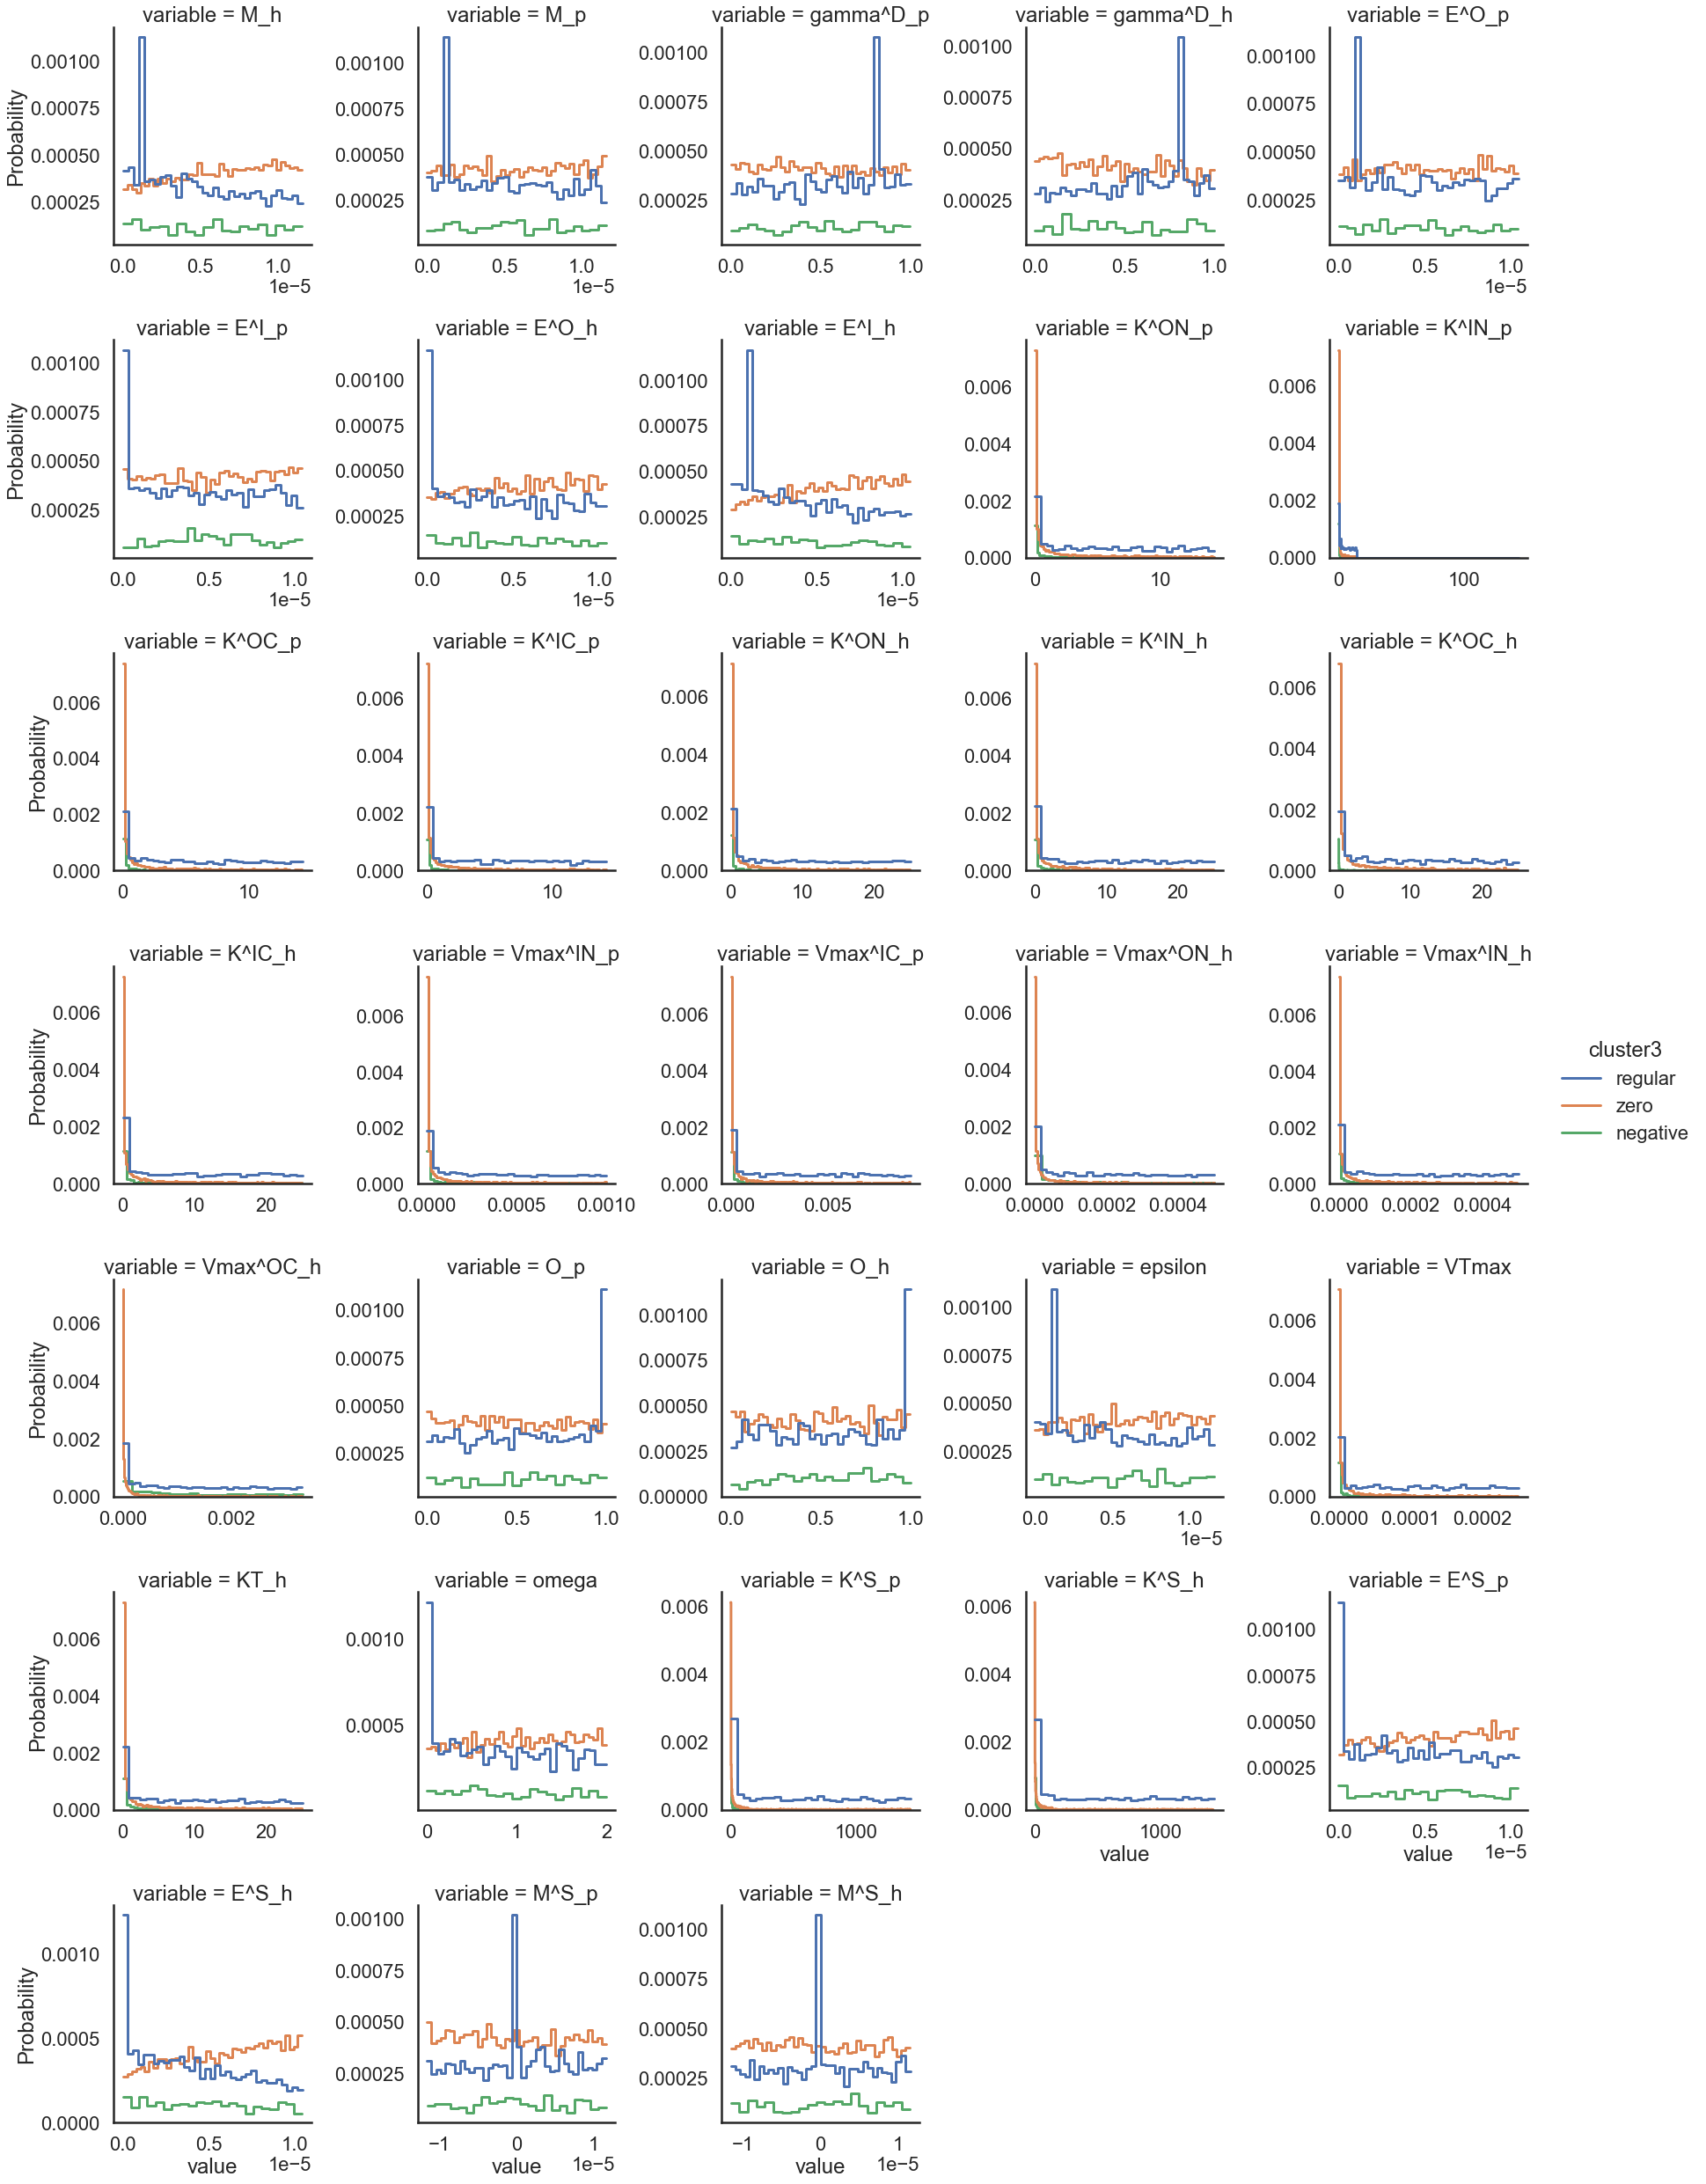

In [24]:
sns.displot(data=mdf, col='variable', x='value', hue='cluster3', 
            col_order=x_cols, col_wrap=5,
            stat='probability', 
            element="step", fill=False,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False), 
            #log_scale=True,
           )

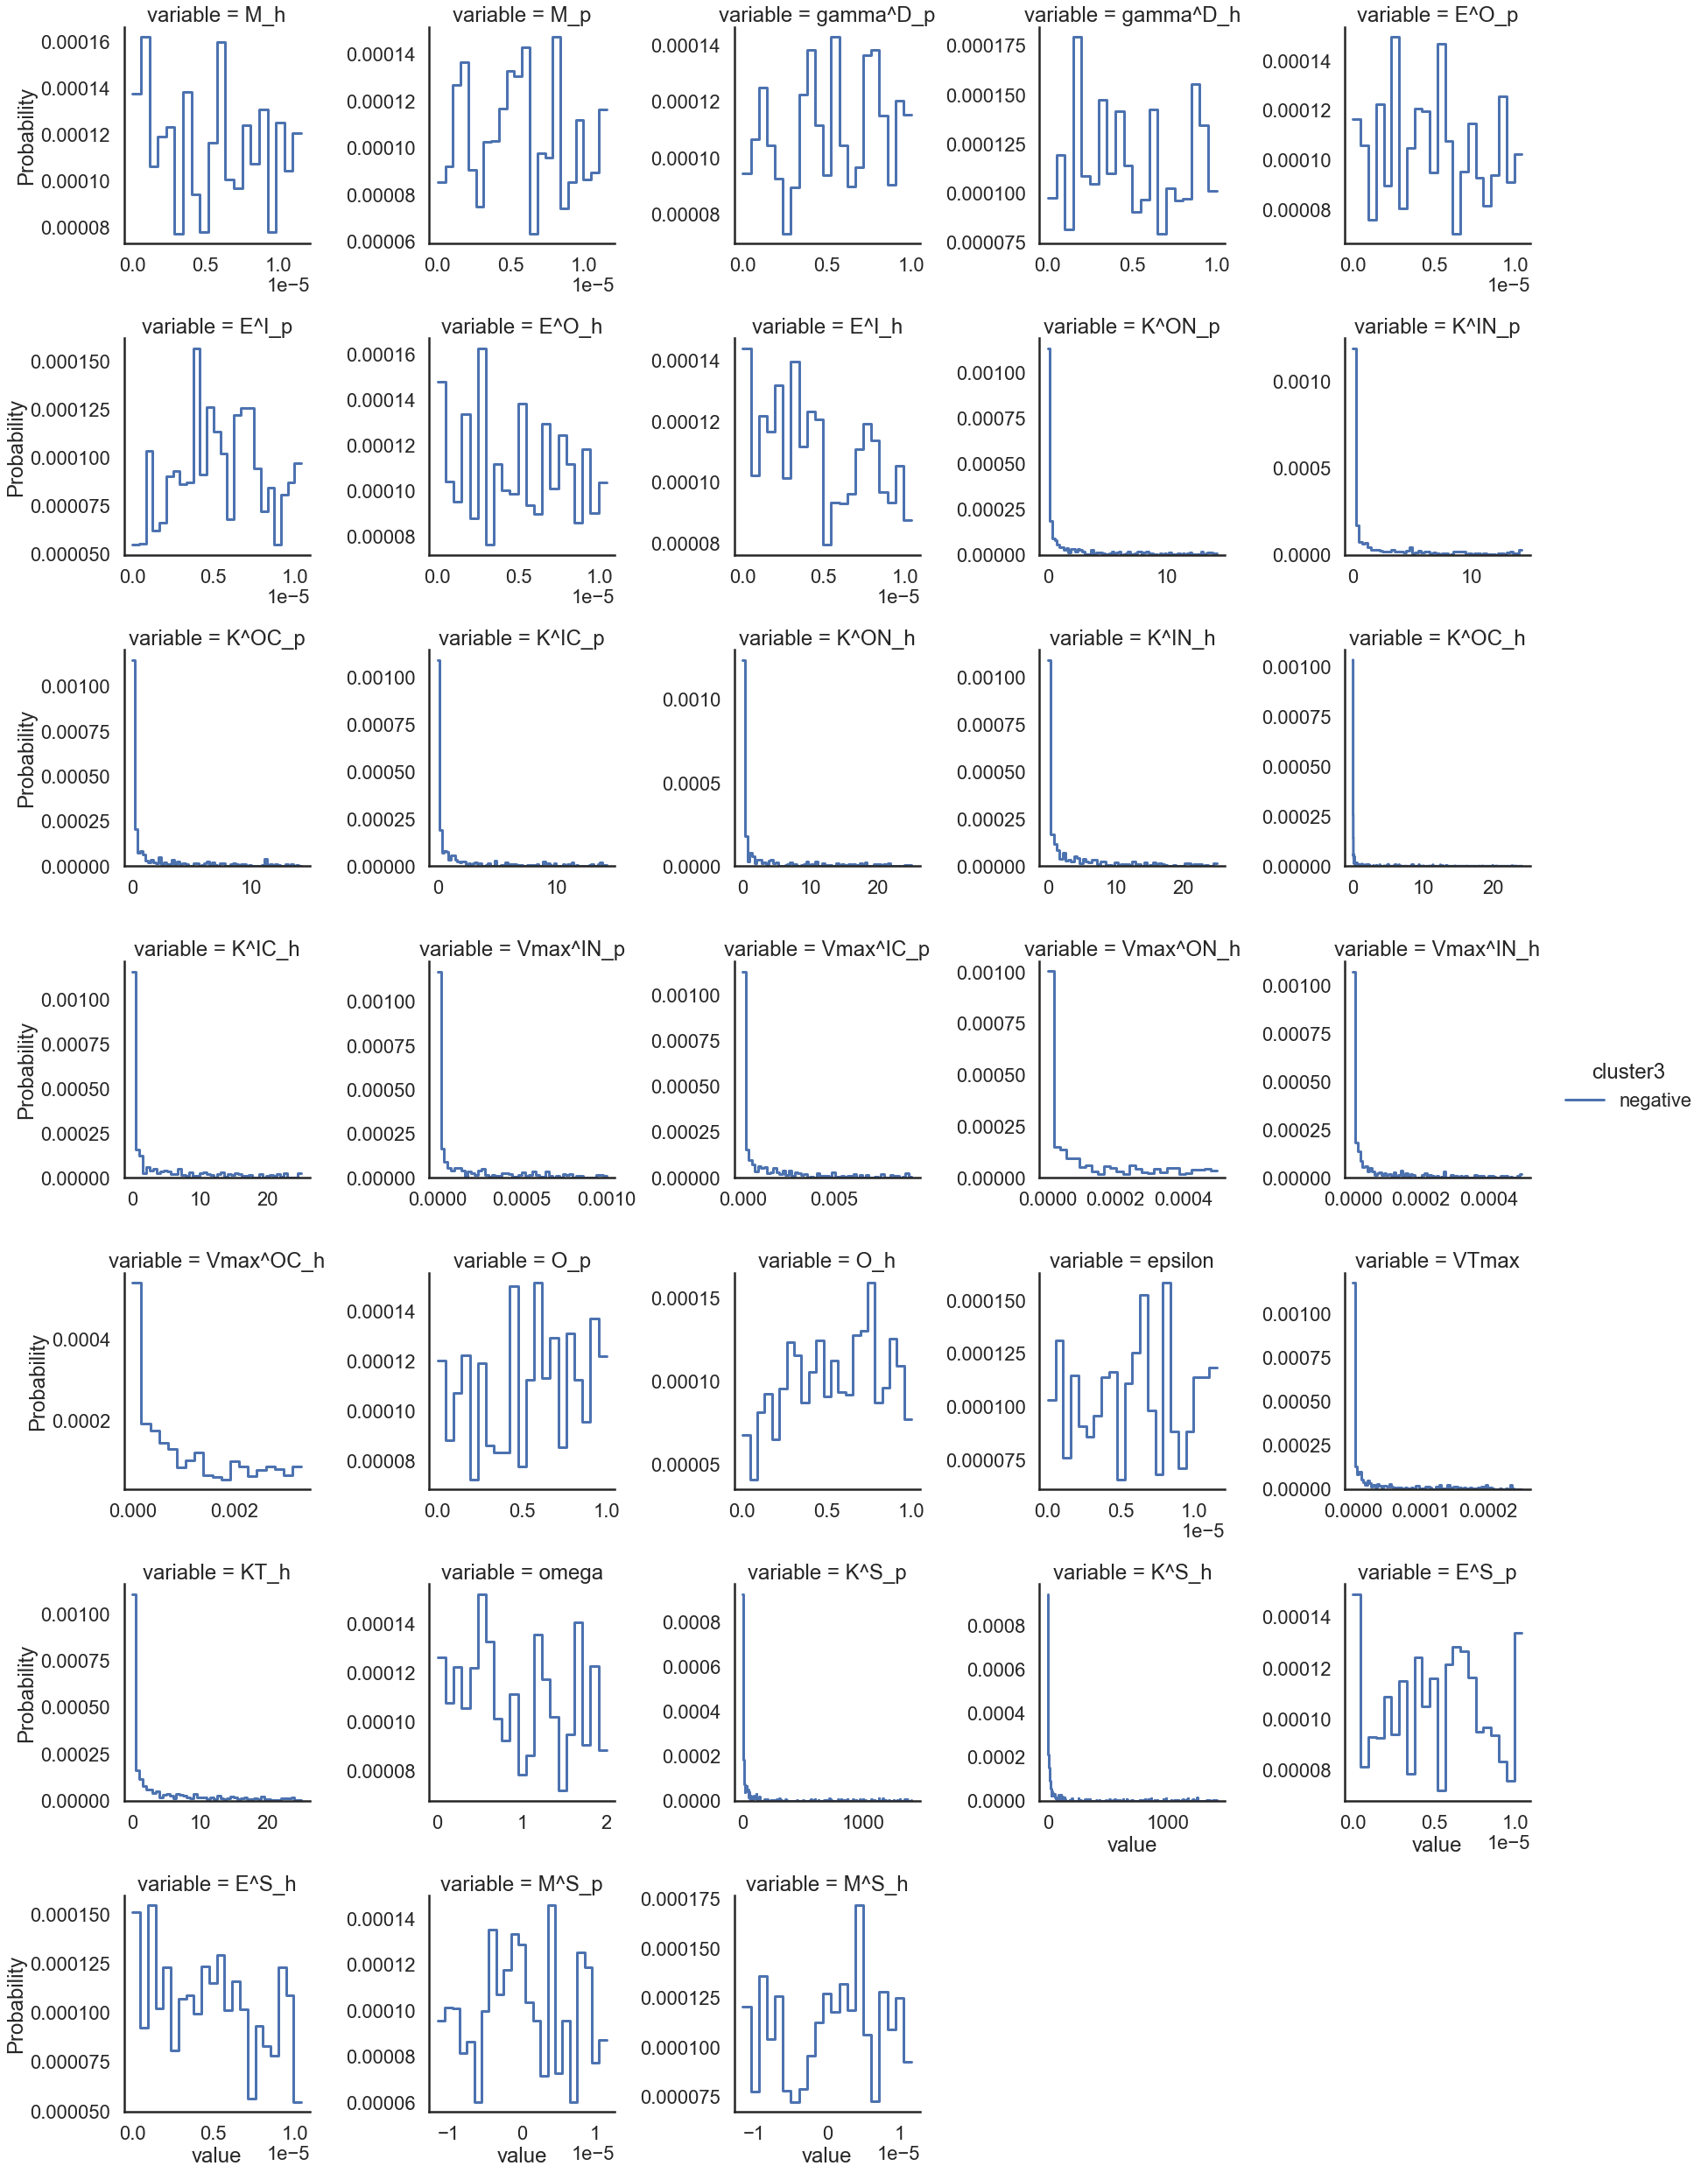

In [25]:
sns.displot(data=mdf, col='variable', x='value', hue='cluster3', 
            col_order=x_cols, col_wrap=5,
            hue_order=['negative'],
            stat='probability', 
            element="step", fill=False,
            common_bins=False,
            facet_kws=dict(sharex=False, sharey=False), 
            #log_scale=True,
           )